In [1]:
# ========================================================================
#                   Python Data Visualization Mastery
# ========================================================================
#    Module: Matplotlib - Basic Plot Types
#    Topic: Essential Visualization Techniques
#    
#    Description:
#    This notebook explores the fundamental plot types available in Matplotlib.
#    We'll cover line plots, scatter plots, bar charts, histograms, and pie charts,
#    examining their features, customization options, and appropriate use cases.
#    
#    Contents:
#    1. Line Plots: Displaying Trends and Relationships
#    2. Scatter Plots: Showing Distribution and Correlation
#    3. Bar Charts and Bar Plots: Comparing Categories
#    4. Histograms: Visualizing Distributions
#    5. Pie Charts: Showing Composition
#    
#    Author: Dr. Saad Laouadi
#    Date: February 2025
#    Version: 1.0
#    
# ========================================================================
#  ®Copyright Dr. Saad Laouadi, 2025. All rights reserved.
# ========================================================================

In [2]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set the style for consistent visuals
plt.style.use('seaborn-v0_8-whitegrid')

## 1. Line Plots: Displaying Trends and Relationships

Line plots connect data points with straight lines, making them ideal for:

- Visualizing trends over time (time series data)
- Showing relationships between continuous variables
- Comparing multiple series on the same scale

They are one of the most fundamental and widely used plot types.

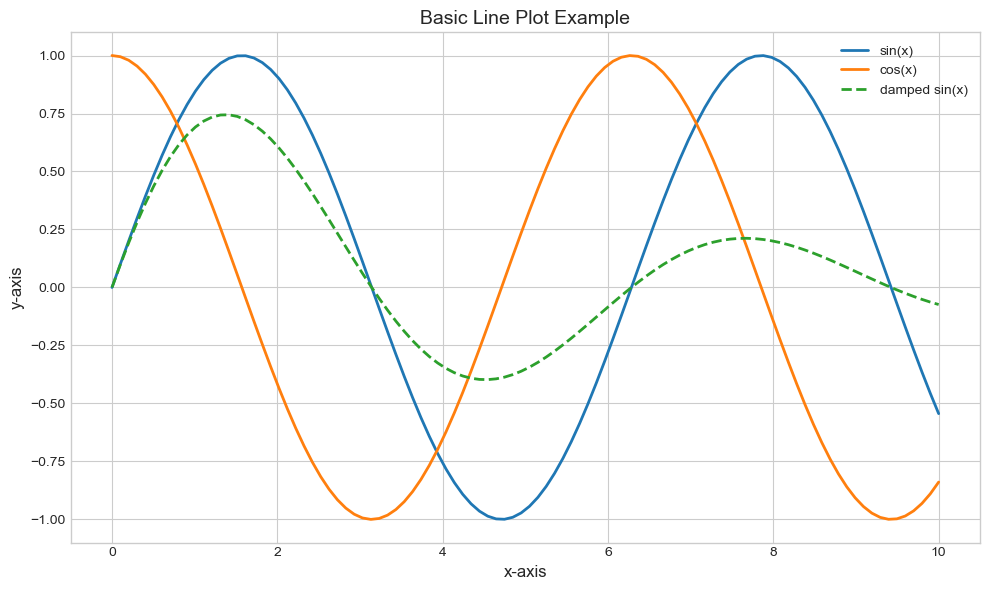

In [4]:
# Basic line plot
fig, ax = plt.subplots(figsize=(10, 6))

# Generate some time series data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.sin(x) * np.exp(-0.2*x)

# Create the line plots
ax.plot(x, y1, label='sin(x)', linewidth=2)
ax.plot(x, y2, label='cos(x)', linewidth=2)
ax.plot(x, y3, label='damped sin(x)', linewidth=2, linestyle='--')

# Add labels and title
ax.set_title('Basic Line Plot Example', fontsize=14)
ax.set_xlabel('x-axis', fontsize=12)
ax.set_ylabel('y-axis', fontsize=12)
ax.legend()

plt.tight_layout()
plt.show()

### Line Plot Customization Options

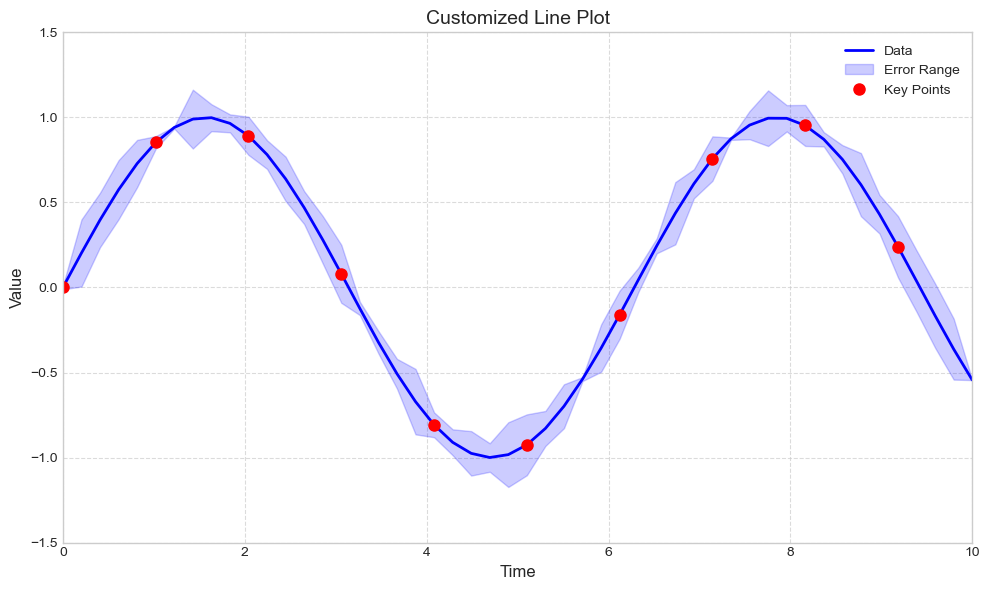

In [5]:
# Create a more customized line plot
fig, ax = plt.subplots(figsize=(10, 6))

# Generate sample data
x = np.linspace(0, 10, 50)
y = np.sin(x)
y_err = 0.2 * np.random.rand(len(x))

# Create a customized line plot
ax.plot(x, y, 'b-', linewidth=2, label='Data')

# Add error range
ax.fill_between(x, y - y_err, y + y_err, alpha=0.2, color='blue', label='Error Range')

# Add markers at specific points
ax.plot(x[::5], y[::5], 'ro', markersize=8, label='Key Points')

# Customize the plot
ax.set_title('Customized Line Plot', fontsize=14)
ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Value', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend()

# Customize axis limits
ax.set_xlim(0, 10)
ax.set_ylim(-1.5, 1.5)

plt.tight_layout()
plt.show()

### Different Line Styles and Markers

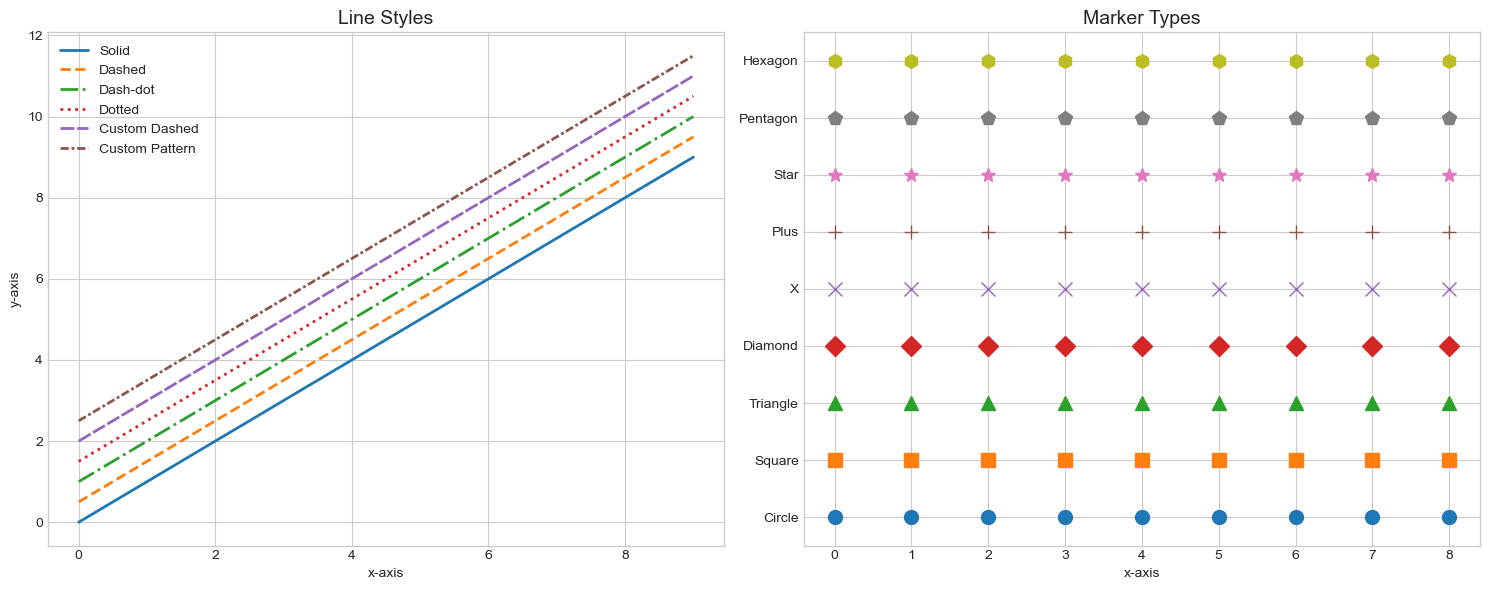

In [6]:
# Demonstrate various line styles and markers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Line styles
line_styles = ['-', '--', '-.', ':', (0, (5, 1)), (0, (3, 1, 1, 1))]
style_names = ['Solid', 'Dashed', 'Dash-dot', 'Dotted', 'Custom Dashed', 'Custom Pattern']

for i, (style, name) in enumerate(zip(line_styles, style_names)):
    ax1.plot(np.arange(10), np.arange(10) + i*0.5, linestyle=style, linewidth=2, label=name)

ax1.set_title('Line Styles', fontsize=14)
ax1.set_xlabel('x-axis')
ax1.set_ylabel('y-axis')
ax1.legend(loc='upper left')

# Markers
markers = ['o', 's', '^', 'D', 'x', '+', '*', 'p', 'h']
marker_names = ['Circle', 'Square', 'Triangle', 'Diamond', 'X', 'Plus', 'Star', 'Pentagon', 'Hexagon']

x = np.arange(9)
for i, (marker, name) in enumerate(zip(markers, marker_names)):
    ax2.plot(x, i * np.ones_like(x), marker=marker, markersize=10, 
             linestyle='none', label=name)

ax2.set_title('Marker Types', fontsize=14)
ax2.set_xlabel('x-axis')
ax2.set_yticks(range(len(markers)))
ax2.set_yticklabels(marker_names)
ax2.set_ylim(-0.5, len(markers) - 0.5)

plt.tight_layout()
plt.show()

### Multiple Y-Axes for Different Scales

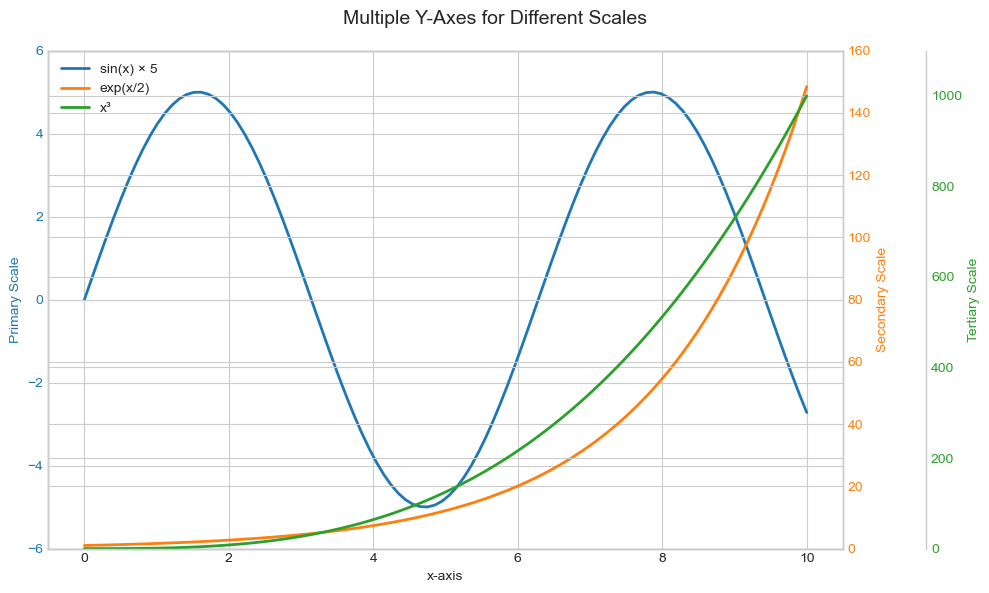

In [7]:
# Create a line plot with multiple y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Generate some sample data with different scales
x = np.linspace(0, 10, 100)
y1 = np.sin(x) * 5  # Small scale (0-5)
y2 = np.exp(x/2)     # Medium scale (1-150)
y3 = x**3            # Large scale (0-1000)

# Plot the first line on the primary y-axis
color1 = 'tab:blue'
ax1.plot(x, y1, color=color1, linewidth=2, label='sin(x) × 5')
ax1.set_xlabel('x-axis')
ax1.set_ylabel('Primary Scale', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_ylim(-6, 6)

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
color2 = 'tab:orange'
ax2.plot(x, y2, color=color2, linewidth=2, label='exp(x/2)')
ax2.set_ylabel('Secondary Scale', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylim(0, 160)

# Create a third y-axis
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Move the spine outward
color3 = 'tab:green'
ax3.plot(x, y3, color=color3, linewidth=2, label='x³')
ax3.set_ylabel('Tertiary Scale', color=color3)
ax3.tick_params(axis='y', labelcolor=color3)
ax3.set_ylim(0, 1100)

# Add a title
fig.suptitle('Multiple Y-Axes for Different Scales', fontsize=14)

# Create a combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax1.legend(lines1 + lines2 + lines3, labels1 + labels2 + labels3, loc='upper left')

plt.tight_layout()
plt.show()

## 2. Scatter Plots: Showing Distribution and Correlation

Scatter plots display individual data points as markers, without connecting lines. They are ideal for:

- Visualizing the relationship between two variables
- Identifying patterns, clusters, or outliers
- Showing data distribution across two dimensions
- Visualizing correlation between variables

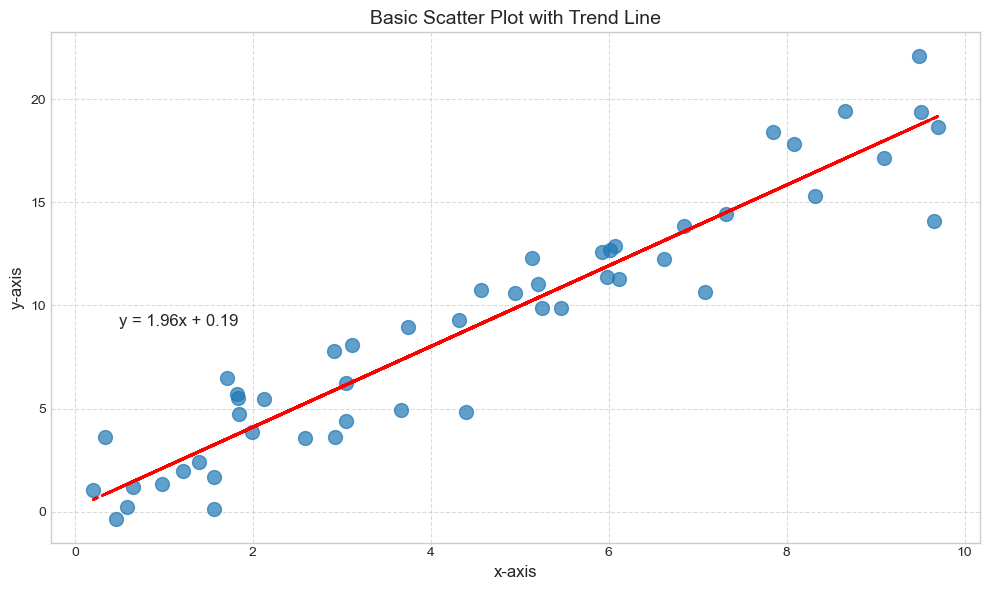

In [8]:
# Basic scatter plot
fig, ax = plt.subplots(figsize=(10, 6))

# Generate random data
np.random.seed(42)
x = np.random.rand(50) * 10
y = 2 * x + np.random.randn(50) * 2

# Create a basic scatter plot
ax.scatter(x, y, s=100, alpha=0.7)

# Add a linear trend line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax.plot(x, p(x), 'r--', linewidth=2)

# Add text showing the equation
equation = f'y = {z[0]:.2f}x + {z[1]:.2f}'
ax.text(0.5, 9, equation, fontsize=12)

# Customize the plot
ax.set_title('Basic Scatter Plot with Trend Line', fontsize=14)
ax.set_xlabel('x-axis', fontsize=12)
ax.set_ylabel('y-axis', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Customizing Scatter Plots

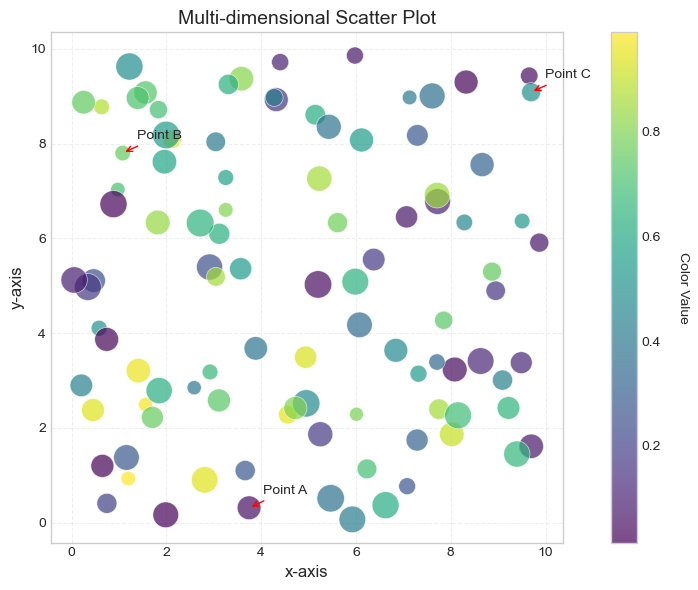

In [9]:
# Advanced scatter plot with multiple dimensions encoded
fig, ax = plt.subplots(figsize=(10, 6))

# Generate sample data
np.random.seed(42)
n = 100
x = np.random.rand(n) * 10
y = np.random.rand(n) * 10
size = np.random.rand(n) * 300 + 100  # Point size
colors = np.random.rand(n)             # Color dimension
categories = np.random.randint(0, 3, n)  # Categories (0, 1, 2)

# Create a scatter plot with size, color, and shape encoding
scatter = ax.scatter(x, y, s=size, c=colors, cmap='viridis', 
                    alpha=0.7, edgecolors='white', linewidth=0.5)

# Add a color bar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Color Value', rotation=270, labelpad=20)

# Customize the plot
ax.set_title('Multi-dimensional Scatter Plot', fontsize=14)
ax.set_xlabel('x-axis', fontsize=12)
ax.set_ylabel('y-axis', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.3)

# Set aspect ratio to be equal
ax.set_aspect('equal')

# Add some annotations to interesting points
interesting_points = [(x[0], y[0]), (x[-1], y[-1]), (x[n//2], y[n//2])]
labels = ['Point A', 'Point B', 'Point C']

for point, label in zip(interesting_points, labels):
    ax.annotate(label, xy=point, xytext=(10, 10), textcoords='offset points',
                arrowprops=dict(arrowstyle='->', color='red'))

plt.tight_layout()
plt.show()

### Visualizing Correlation with Scatter Plots

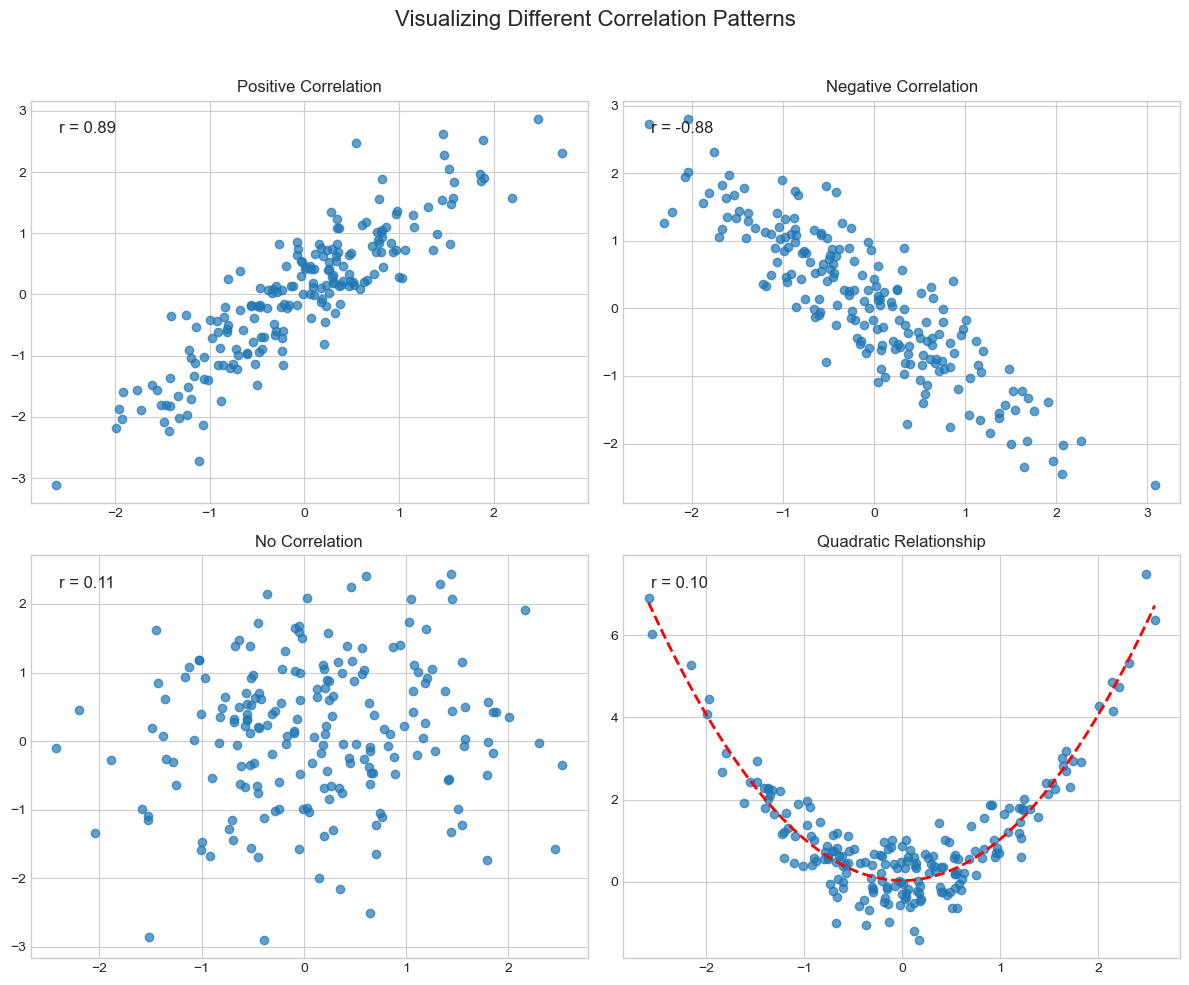

In [10]:
# Generate correlated data to visualize
np.random.seed(42)
n = 200

# Create data with different correlation patterns
pos_corr_x = np.random.randn(n)
pos_corr_y = pos_corr_x + np.random.randn(n) * 0.5  # Positive correlation

neg_corr_x = np.random.randn(n)
neg_corr_y = -neg_corr_x + np.random.randn(n) * 0.5  # Negative correlation

no_corr_x = np.random.randn(n)
no_corr_y = np.random.randn(n)  # No correlation

quad_x = np.random.randn(n)
quad_y = quad_x**2 + np.random.randn(n) * 0.5  # Quadratic relationship

# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

# Plot each type of correlation
axs[0].scatter(pos_corr_x, pos_corr_y, alpha=0.7)
axs[0].set_title('Positive Correlation')
r_pos = np.corrcoef(pos_corr_x, pos_corr_y)[0, 1]
axs[0].text(0.05, 0.95, f'r = {r_pos:.2f}', transform=axs[0].transAxes, 
            va='top', fontsize=12)

axs[1].scatter(neg_corr_x, neg_corr_y, alpha=0.7)
axs[1].set_title('Negative Correlation')
r_neg = np.corrcoef(neg_corr_x, neg_corr_y)[0, 1]
axs[1].text(0.05, 0.95, f'r = {r_neg:.2f}', transform=axs[1].transAxes, 
            va='top', fontsize=12)

axs[2].scatter(no_corr_x, no_corr_y, alpha=0.7)
axs[2].set_title('No Correlation')
r_no = np.corrcoef(no_corr_x, no_corr_y)[0, 1]
axs[2].text(0.05, 0.95, f'r = {r_no:.2f}', transform=axs[2].transAxes, 
            va='top', fontsize=12)

axs[3].scatter(quad_x, quad_y, alpha=0.7)
axs[3].set_title('Quadratic Relationship')
r_quad = np.corrcoef(quad_x, quad_y)[0, 1]
axs[3].text(0.05, 0.95, f'r = {r_quad:.2f}', transform=axs[3].transAxes, 
            va='top', fontsize=12)

# Add a quadratic fit line
quad_fit = np.polyfit(quad_x, quad_y, 2)
quad_fit_fn = np.poly1d(quad_fit)
x_range = np.linspace(min(quad_x), max(quad_x), 100)
axs[3].plot(x_range, quad_fit_fn(x_range), 'r--', linewidth=2)

# Set layout and title
fig.suptitle('Visualizing Different Correlation Patterns', fontsize=16, y=0.98)
fig.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## 3. Bar Charts and Bar Plots: Comparing Categories

Bar charts display categorical data with rectangular bars, and are ideal for:

- Comparing values across different categories
- Showing frequency counts or distribution across categories
- Visualizing changes over time for discrete intervals
- Comparing parts of a whole (with stacked or grouped bars)

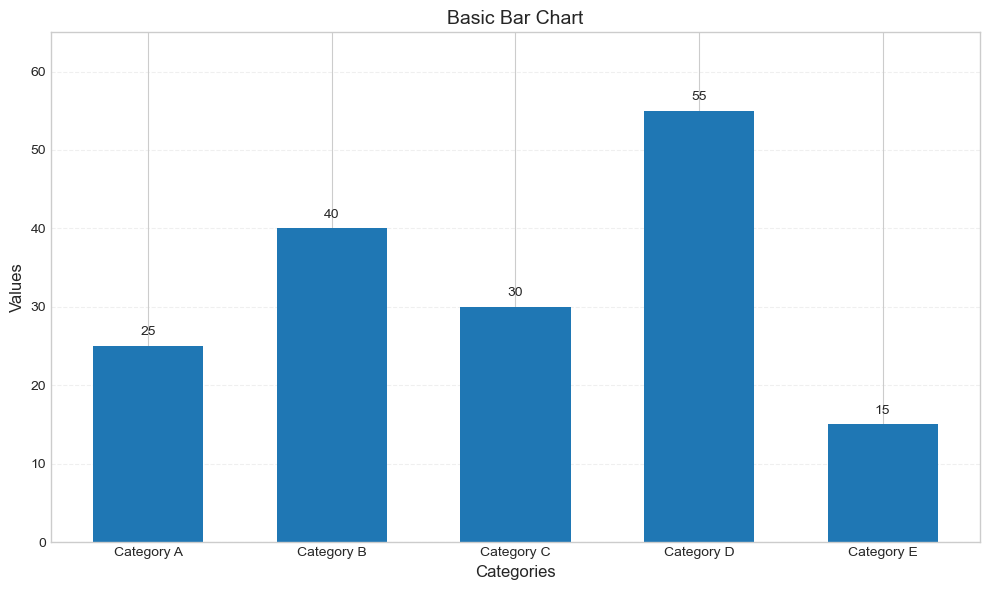

In [11]:
# Basic bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Sample data for different categories
categories = ['Category A', 'Category B', 'Category C', 'Category D', 'Category E']
values = [25, 40, 30, 55, 15]

# Create a bar chart
bars = ax.bar(categories, values, width=0.6)

# Add direct labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{height}', ha='center', va='bottom')

# Customize the plot
ax.set_title('Basic Bar Chart', fontsize=14)
ax.set_xlabel('Categories', fontsize=12)
ax.set_ylabel('Values', fontsize=12)
ax.set_ylim(0, max(values) + 10)  # Add some headroom for labels

# Add a subtle grid for better readability
ax.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

### Horizontal Bar Charts

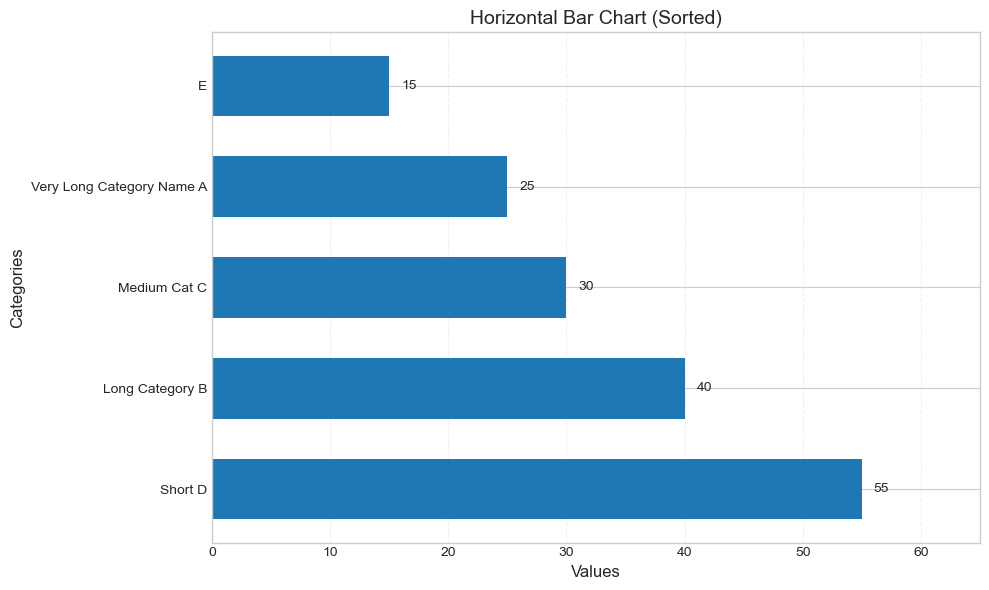

In [12]:
# Horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Sample data with longer category names
categories = ['Very Long Category Name A', 'Long Category B', 
              'Medium Cat C', 'Short D', 'E']
values = [25, 40, 30, 55, 15]

# Sort data in descending order
sorted_indices = np.argsort(values)[::-1]
sorted_categories = [categories[i] for i in sorted_indices]
sorted_values = [values[i] for i in sorted_indices]

# Create a horizontal bar chart
bars = ax.barh(sorted_categories, sorted_values, height=0.6)

# Add direct labels on each bar
for bar in bars:
    width = bar.get_width()
    ax.text(width + 1, bar.get_y() + bar.get_height()/2., 
            f'{width}', va='center')

# Customize the plot
ax.set_title('Horizontal Bar Chart (Sorted)', fontsize=14)
ax.set_xlabel('Values', fontsize=12)
ax.set_ylabel('Categories', fontsize=12)
ax.set_xlim(0, max(values) + 10)  # Add some headroom for labels

# Add a subtle grid for better readability
ax.grid(axis='x', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

### Grouped and Stacked Bar Charts

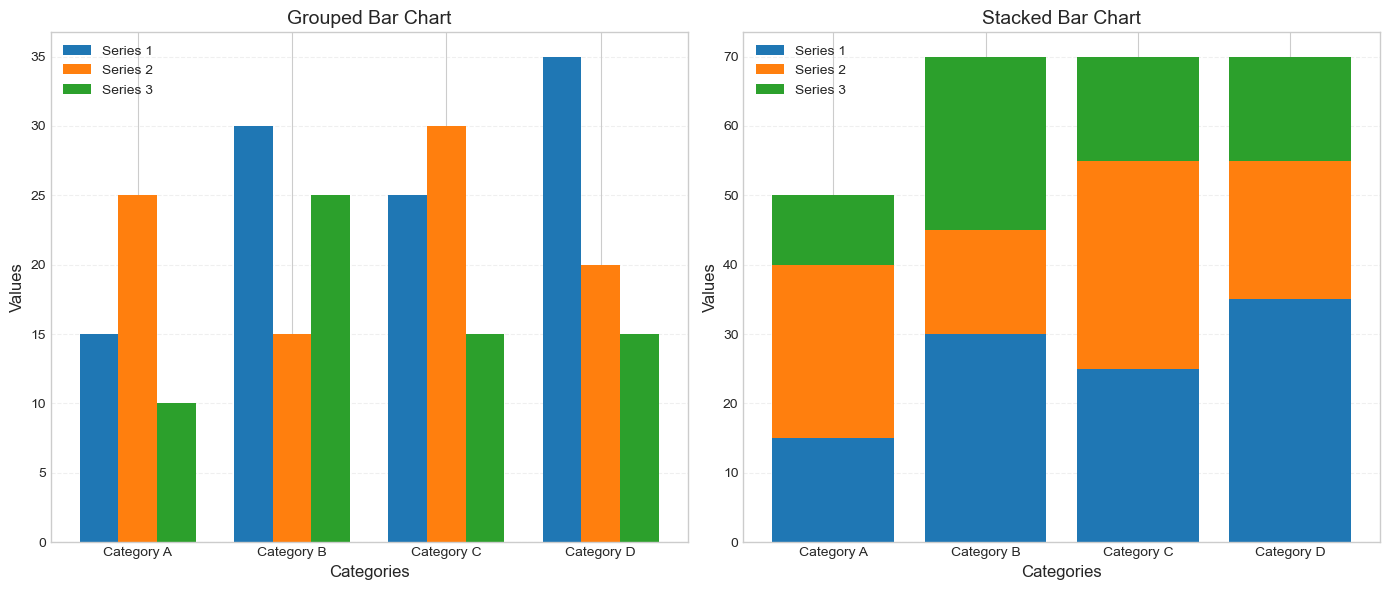

In [13]:
# Grouped and stacked bar charts side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Sample data
categories = ['Category A', 'Category B', 'Category C', 'Category D']
series1 = [15, 30, 25, 35]
series2 = [25, 15, 30, 20]
series3 = [10, 25, 15, 15]

# Set the width of the bars
bar_width = 0.25
index = np.arange(len(categories))

# Grouped bar chart
bars1 = ax1.bar(index - bar_width, series1, bar_width, label='Series 1')
bars2 = ax1.bar(index, series2, bar_width, label='Series 2')
bars3 = ax1.bar(index + bar_width, series3, bar_width, label='Series 3')

# Customize grouped bar chart
ax1.set_title('Grouped Bar Chart', fontsize=14)
ax1.set_xlabel('Categories', fontsize=12)
ax1.set_ylabel('Values', fontsize=12)
ax1.set_xticks(index)
ax1.set_xticklabels(categories)
ax1.legend()
ax1.grid(axis='y', linestyle='--', alpha=0.3)

# Stacked bar chart
bars1 = ax2.bar(categories, series1, label='Series 1')
bars2 = ax2.bar(categories, series2, bottom=series1, label='Series 2')
bars3 = ax2.bar(categories, series3, bottom=np.array(series1) + np.array(series2), 
                label='Series 3')

# Customize stacked bar chart
ax2.set_title('Stacked Bar Chart', fontsize=14)
ax2.set_xlabel('Categories', fontsize=12)
ax2.set_ylabel('Values', fontsize=12)
ax2.legend()
ax2.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Histograms: Visualizing Distributions

Histograms display the distribution of a dataset by dividing the data into bins and showing the frequency of values in each bin. They are ideal for:

- Visualizing the distribution of a single variable
- Identifying the shape, central tendency, and spread of data
- Finding outliers and understanding data patterns
- Comparing distributions across different datasets

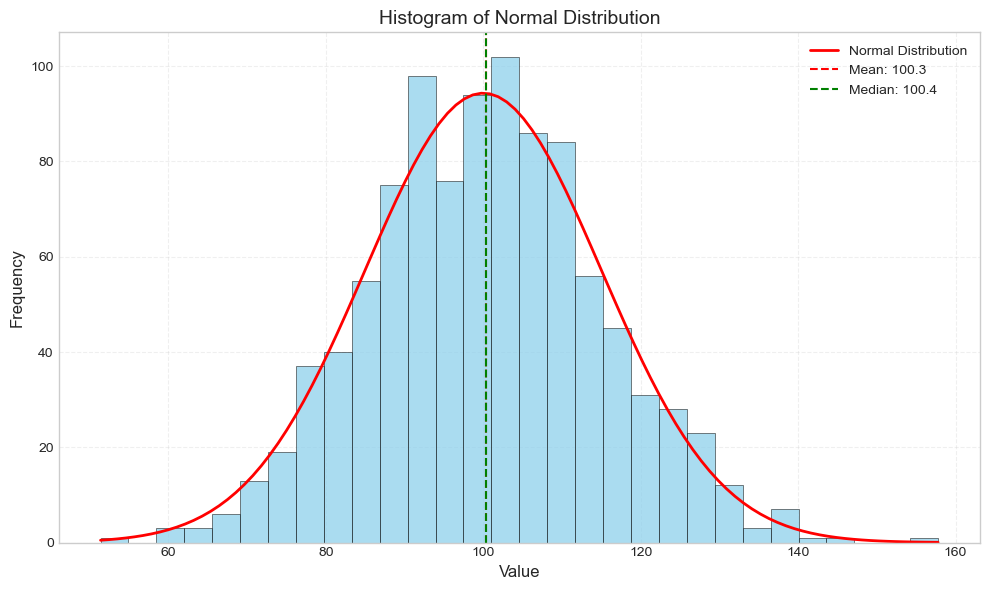

In [14]:
# Basic histogram
fig, ax = plt.subplots(figsize=(10, 6))

# Generate sample data
np.random.seed(42)
data = np.random.normal(100, 15, 1000)  # Mean=100, std=15, 1000 points

# Create a histogram
n, bins, patches = ax.hist(data, bins=30, alpha=0.7, color='skyblue', 
                          edgecolor='black', linewidth=0.5)

# Add a normal distribution curve
x = np.linspace(min(data), max(data), 100)
y = ((1 / (np.sqrt(2 * np.pi) * 15)) * 
     np.exp(-0.5 * ((x - 100) / 15) ** 2)) * len(data) * (bins[1] - bins[0])
ax.plot(x, y, 'r-', linewidth=2, label='Normal Distribution')

# Add vertical lines for key statistics
ax.axvline(np.mean(data), color='red', linestyle='--', linewidth=1.5, 
           label=f'Mean: {np.mean(data):.1f}')
ax.axvline(np.median(data), color='green', linestyle='--', linewidth=1.5, 
           label=f'Median: {np.median(data):.1f}')

# Customize the plot
ax.set_title('Histogram of Normal Distribution', fontsize=14)
ax.set_xlabel('Value', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

### Customizing Histograms and Comparing Distributions

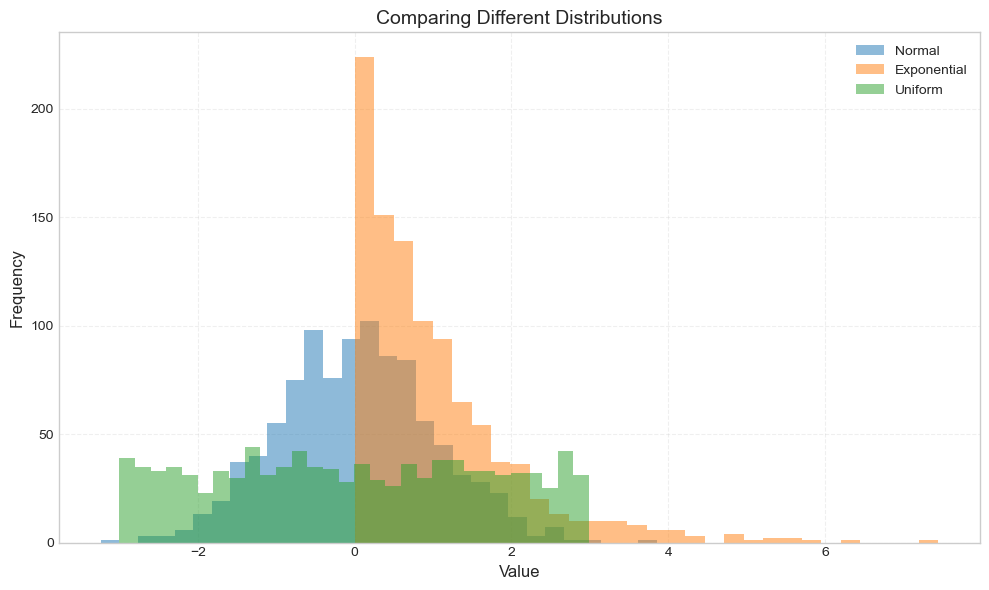

In [15]:
# Multiple histograms for comparison
fig, ax = plt.subplots(figsize=(10, 6))

# Generate multiple datasets with different distributions
np.random.seed(42)
data1 = np.random.normal(0, 1, 1000)      # Normal distribution
data2 = np.random.exponential(1, 1000)    # Exponential distribution
data3 = np.random.uniform(-3, 3, 1000)    # Uniform distribution

# Plot histograms with transparency for comparison
ax.hist(data1, bins=30, alpha=0.5, label='Normal')
ax.hist(data2, bins=30, alpha=0.5, label='Exponential')
ax.hist(data3, bins=30, alpha=0.5, label='Uniform')

# Customize the plot
ax.set_title('Comparing Different Distributions', fontsize=14)
ax.set_xlabel('Value', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

### 2D Histograms (Heatmaps)

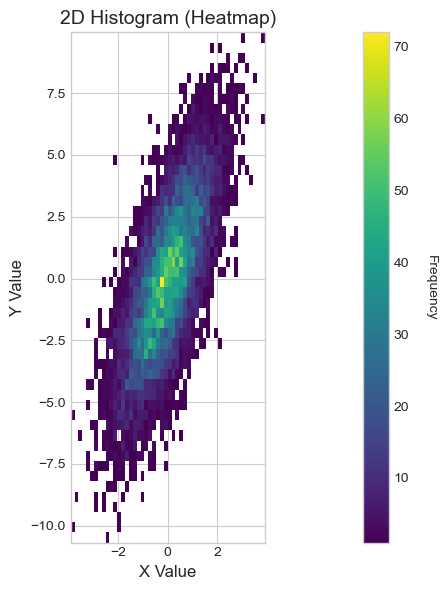

In [20]:
# 2D histogram (heatmap)
fig, ax = plt.subplots(figsize=(20, 6))

# Generate correlated data
np.random.seed(42)
n = 10000
x = np.random.standard_normal(n)
y = 2 * x + np.random.standard_normal(n) * 2

# Create a 2D histogram
hist = ax.hist2d(x, y, bins=50, cmap='viridis', cmin=1)

# Add a colorbar
cbar = plt.colorbar(hist[3], ax=ax)
cbar.set_label('Frequency', rotation=270, labelpad=20)

# Customize the plot
ax.set_title('2D Histogram (Heatmap)', fontsize=14)
ax.set_xlabel('X Value', fontsize=12)
ax.set_ylabel('Y Value', fontsize=12)
ax.set_aspect('equal')

plt.tight_layout()
plt.show()

## 5. Pie Charts: Showing Composition

Pie charts display data as slices of a circular "pie," with each slice representing a category's proportion of the whole. They are best used for:

- Showing composition or proportion of categories
- Displaying data where the sum of all categories equals 100%
- Visualizing a small number of categories (ideally 5-7 or fewer)

Note: While widely used, pie charts are sometimes criticized because humans are not good at comparing angles. Bar charts are often a clearer alternative.

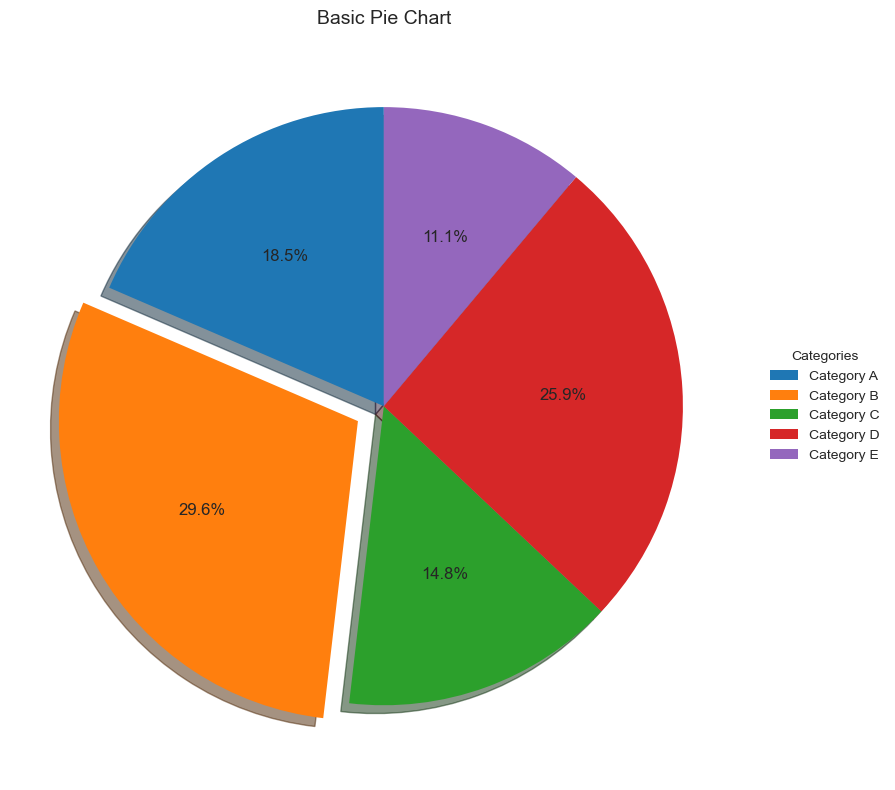

In [21]:
# Basic pie chart
fig, ax = plt.subplots(figsize=(10, 8))

# Sample data
categories = ['Category A', 'Category B', 'Category C', 'Category D', 'Category E']
values = [25, 40, 20, 35, 15]

# Create a pie chart
wedges, texts, autotexts = ax.pie(
    values, 
    autopct='%1.1f%%',     # Show percentages
    textprops={'fontsize': 12},
    shadow=True,           # Add shadow
    startangle=90,         # Start angle
    explode=(0, 0.1, 0, 0, 0)  # Explode the second slice
)

# Customize the pie chart
ax.set_title('Basic Pie Chart', fontsize=14)
ax.legend(wedges, categories, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_aspect('equal')  # Ensure the pie chart is circular

plt.tight_layout()
plt.show()

### Donut Charts

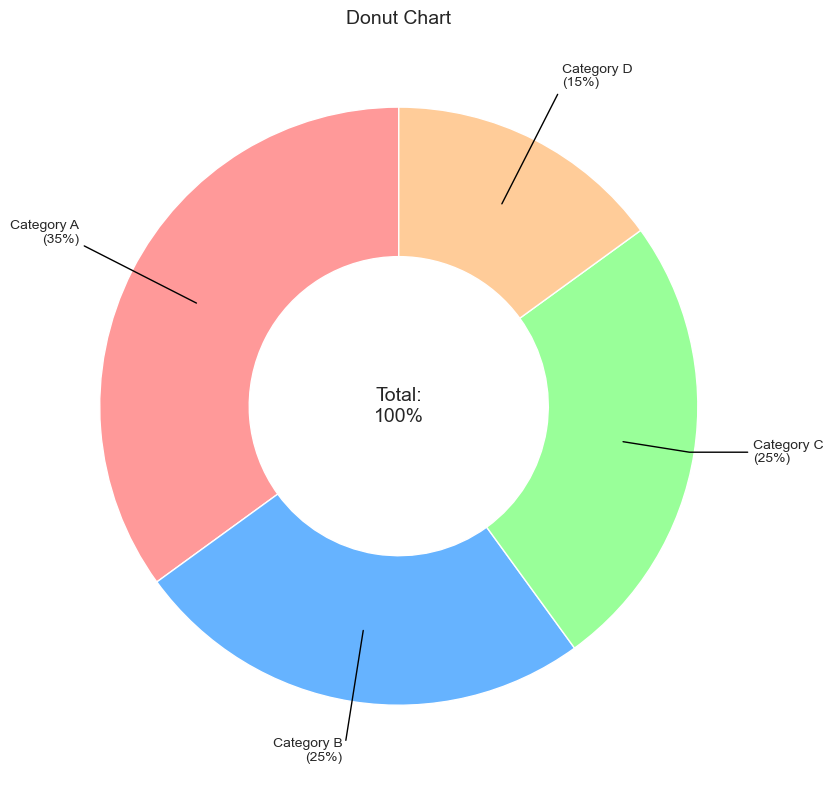

In [22]:
# Donut chart (pie chart with a hole)
fig, ax = plt.subplots(figsize=(10, 8))

# Sample data
categories = ['Category A', 'Category B', 'Category C', 'Category D']
values = [35, 25, 25, 15]
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

# Create a pie chart with a hole (donut chart)
wedges, texts = ax.pie(
    values, 
    colors=colors,
    startangle=90,
    wedgeprops={'width': 0.5, 'edgecolor': 'w'}  # The width creates the hole
)

# Add a circle in the center to make it look more like a donut
circle = plt.Circle((0, 0), 0.25, fc='white')
ax.add_patch(circle)

# Add category labels outside the donut
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    ax.annotate(
        f"{categories[i]}\n({values[i]}%)", 
        xy=(x * 0.75, y * 0.75),  # Position of the wedge
        xytext=(1.2 * x, 1.2 * y),    # Position of the label
        horizontalalignment=horizontalalignment,
        arrowprops=dict(arrowstyle="-", connectionstyle=connectionstyle)
    )

# Add a title and adjust the center to add total
ax.set_title('Donut Chart', fontsize=14)
ax.text(0, 0, 'Total:\n100%', ha='center', va='center', fontsize=14)

ax.set_aspect('equal')  # Ensure the pie chart is circular

plt.tight_layout()
plt.show()

### Nested Pie Charts

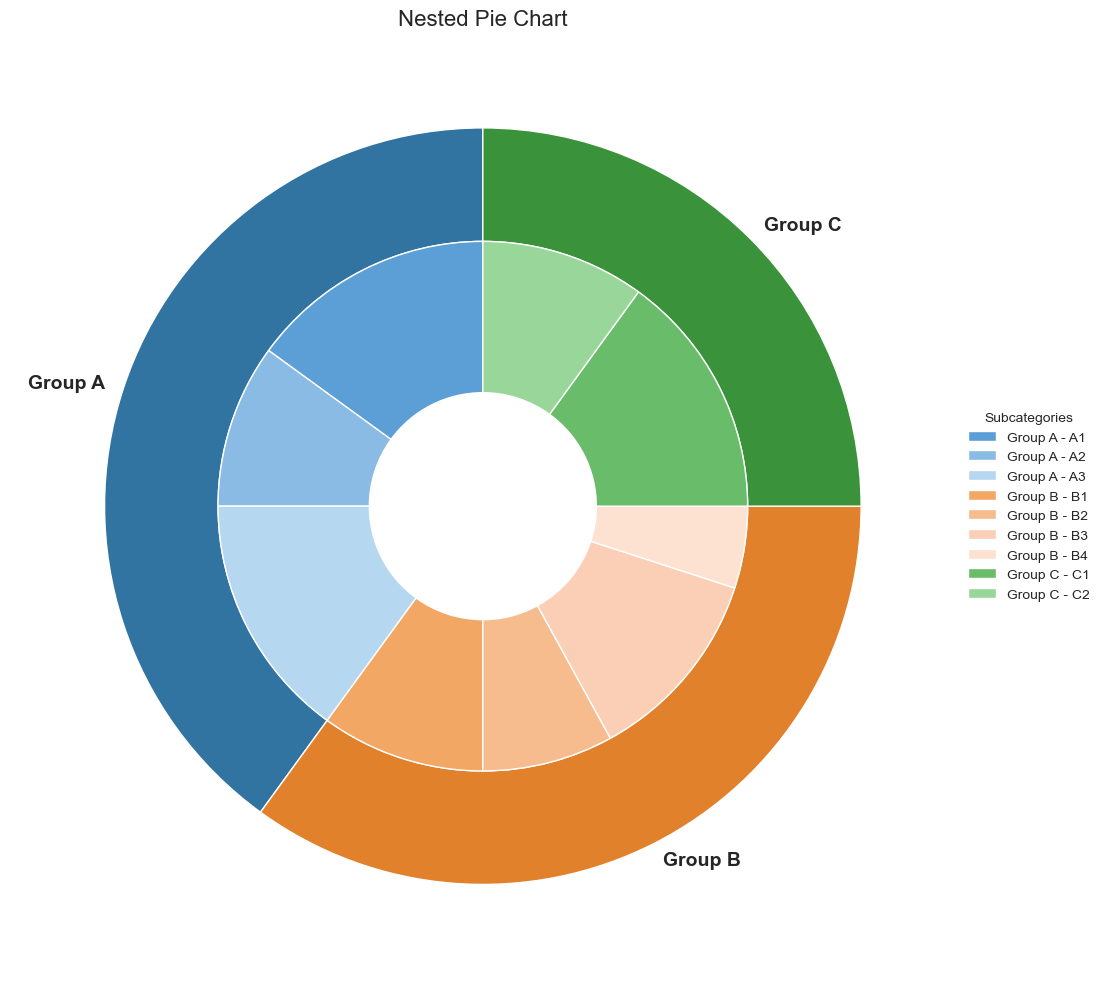

In [23]:
# Nested pie chart (pie chart with multiple levels)
fig, ax = plt.subplots(figsize=(12, 10))

# Sample data for two levels
# First level categories
level1_categories = ['Group A', 'Group B', 'Group C']
level1_values = [40, 35, 25]
level1_colors = ['#3274A1', '#E1812C', '#3A923A']

# Second level subcategories and values
level2_categories = [
    ['A1', 'A2', 'A3'],            # Subcategories for Group A
    ['B1', 'B2', 'B3', 'B4'],      # Subcategories for Group B
    ['C1', 'C2']                   # Subcategories for Group C
]
level2_values = [
    [15, 10, 15],                  # Values for Group A subcategories
    [10, 8, 12, 5],                # Values for Group B subcategories
    [15, 10]                       # Values for Group C subcategories
]
level2_colors = [
    ['#5C9FD7', '#89BBE4', '#B5D7F0'],                  # Colors for Group A subcategories
    ['#F2A765', '#F6BC8D', '#FACFB5', '#FDE1D1'],      # Colors for Group B subcategories
    ['#69BC69', '#99D699']                              # Colors for Group C subcategories
]

# Create the outer pie chart (first level)
wedges1, texts1 = ax.pie(
    level1_values, 
    colors=level1_colors,
    radius=1.0,
    wedgeprops=dict(width=0.3, edgecolor='w'),
    startangle=90,
    labels=level1_categories,
    labeldistance=1.05,
    textprops={'fontweight': 'bold', 'fontsize': 14}
)

# Create the inner pie chart (second level)
# First, flatten the lists for the second level
level2_values_flat = [val for sublist in level2_values for val in sublist]
level2_colors_flat = [color for sublist in level2_colors for color in sublist]
level2_categories_flat = [f"{l1} - {l2}" for l1, subcats in zip(level1_categories, level2_categories) 
                         for l2 in subcats]

# Calculate the width of each wedge for the inner pie chart
# Create the inner pie chart (second level)
wedges2, texts2 = ax.pie(
    level2_values_flat, 
    colors=level2_colors_flat,
    radius=0.7,
    wedgeprops=dict(width=0.4, edgecolor='w'),
    startangle=90
)

# Customize the pie chart
ax.set_title('Nested Pie Chart', fontsize=16)
ax.set_aspect('equal')  # Ensure the pie chart is circular

# Create a legend for the inner pie chart
ax.legend(
    wedges2, 
    level2_categories_flat,
    title="Subcategories",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.tight_layout()
plt.show()